In [2]:
from sklearn.datasets import make_classification, make_moons, load_iris, make_circles
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/home/jaidevd/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Example: Arbitrary classification

In [3]:
X, y = make_classification(n_informative=2, random_state=11)
print(X.shape)

(100, 20)


## Training a simple logistic regression model

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=2)
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
prediction = lr.predict(xtest)
print("F1 score: %f" % f1_score(ytest, prediction))

F1 score: 0.888889


## Reducing dimensionality with PCA

In [7]:
pca = PCA(n_components=2)
x_red = pca.fit_transform(X)
print(x_red.shape)

(100, 2)


## Training on reduced dimensions

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x_red, y, random_state=2)
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
prediction = lr.predict(xtest)
print("F1 score: %f" % f1_score(ytest, prediction))

F1 score: 0.960000


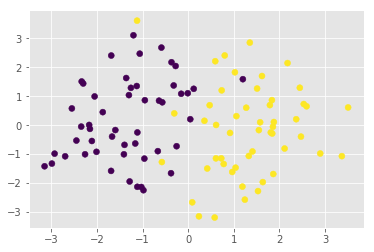

In [9]:
plt.scatter(x_red[:, 0], x_red[:, 1], c=y)

## Exercise:
## 1. Plot top 2 principal components of the iris dataset (already provided below)
## 2. Use LinearSVC to train on full iris dataset and on PCA of iris dataset, check the difference in F1 score.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
# enter code here

## How to select the number of principal components?

# Univariate Feature Selection
## Removing features with Low Variance

In [19]:
X = np.random.normal(size=(1000, 50))

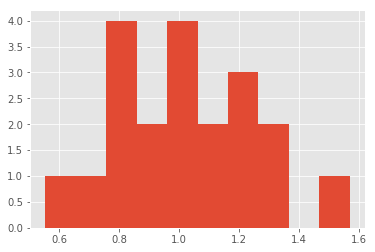

In [35]:
_ = plt.hist(X.var(0))

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
vt = VarianceThreshold(threshold=1.0)

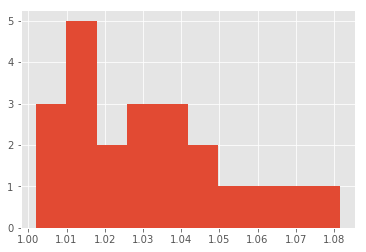

In [25]:
xThresh = vt.fit_transform(X)
_ = plt.hist(xThresh.var(0))

## Which features were dropped?

In [26]:
print(vt.get_support())

[ True False False False  True False False False False False False  True
  True False  True  True  True  True False False  True False  True  True
 False False False False False False  True  True  True False False False
 False  True  True  True False False  True  True  True False False False
  True  True]


In [ ]:
# SelectK Best, RFE, Select from model